# Time Series Forecasting for Covid-19 daily new cases in Missouri state using  Prophet

In [16]:
# Python
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np
from fbprophet import Prophet
import seaborn as sns
import matplotlib.pyplot as plt


In [17]:
df = pd.read_csv('cases.csv')
print(df)

    State  County  Zip        Date
0    1267     387   13  08/13/2020
1    1245     289   10  08/14/2020
2    1127     256    7  08/15/2020
3    1342     187    5  08/16/2020
4    1148     150    9  08/17/2020
..    ...     ...  ...         ...
88   3876     605  202    12/07/20
89   2658     617  200    12/08/20
90   3250     591  195    12/09/20
91   2640     447  191    12/10/20
92   3858     409  182    12/11/20

[93 rows x 4 columns]


In [18]:
#Missouri state data

In [19]:
df = pd.read_csv('cases.csv')
df["Date"]=pd.to_datetime(df["Date"])
df_MO = df[["Date","State"]]
df_MO = df_MO.rename(columns={'State': 'y', 'Date': 'ds'})
df_MO.head()

,ds,y
0,2020-08-13,1267
1,2020-08-14,1245
2,2020-08-15,1127
3,2020-08-16,1342
4,2020-08-17,1148


In [20]:
train_data = df_MO.iloc[:len(df_MO)-10]
test_data = df_MO.iloc[len(df_MO)-10:]
print(test_data)

           ds     y
83 2020-12-01  2929
84 2020-12-03  2679
85 2020-12-04  3998
86 2020-12-05  4053
87 2020-12-06  5001
88 2020-12-07  3876
89 2020-12-08  2658
90 2020-12-09  3250
91 2020-12-10  2640
92 2020-12-11  3858


In [31]:
m = Prophet()
m.fit(train_data)
future = m.make_future_dataframe(periods=10)
prophet_pred = m.predict(future)
prophet_pred[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
88,2020-12-06,4189.432504,3163.747785,5220.036161
89,2020-12-07,3849.559691,2818.482955,4947.569722
90,2020-12-08,3708.985449,2722.323613,4772.536113
91,2020-12-09,4173.378243,3171.184926,5253.412799
92,2020-12-10,4163.814510,3092.300210,5189.809762


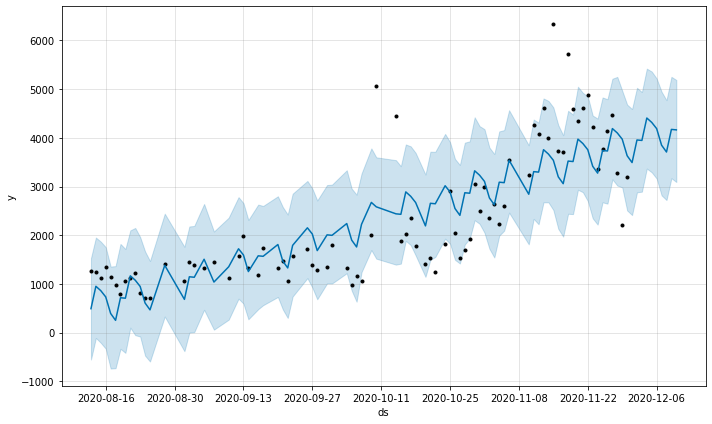

In [32]:
fig1 = m.plot(prophet_pred)

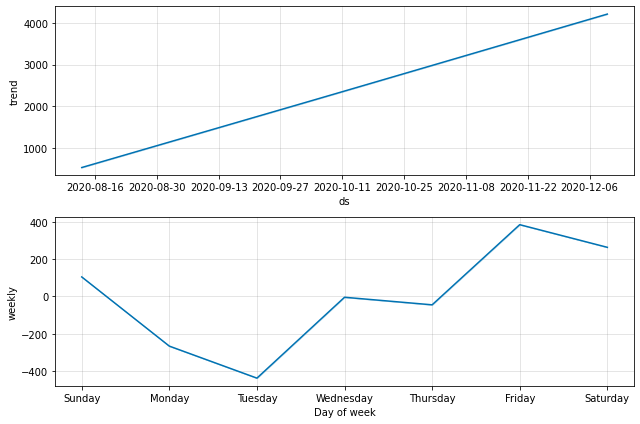

In [33]:
fig2 = m.plot_components(prophet_pred)

In [34]:
prophet_pred = pd.DataFrame({"Date" : prophet_pred[-10:]['ds'], "Pred" : prophet_pred[-10:]["yhat"]})
prophet_pred = prophet_pred.set_index("Date")
prophet_pred

,Pred
Date,
2020-12-01,3492.109728
2020-12-02,3956.502522
2020-12-03,3946.938789
2020-12-04,4407.490230
2020-12-05,4317.112491
2020-12-06,4189.432504
2020-12-07,3849.559691
2020-12-08,3708.985449
2020-12-09,4173.378243


<ipython-input-35-b9d8127c6aa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["Prophet_Predictions"] = prophet_pred['Pred'].values


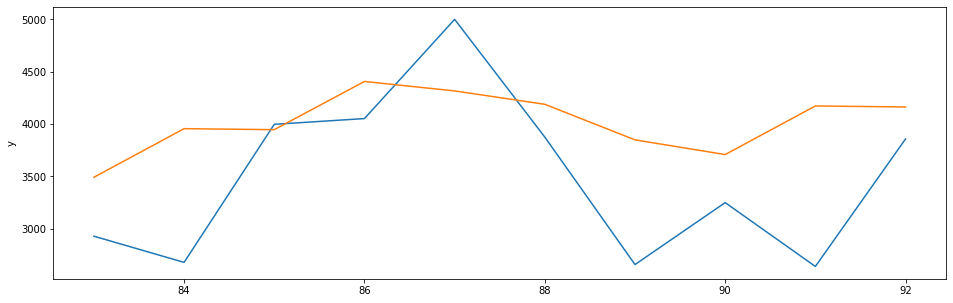

In [35]:
test_data["Prophet_Predictions"] = prophet_pred['Pred'].values
plt.figure(figsize=(16,5))
ax = sns.lineplot(x= test_data.index, y=test_data["y"])
sns.lineplot(x=test_data.index, y = test_data["Prophet_Predictions"]);

#### The blue line represents dialy new Covid cases in Missouri state and the orange line represents Prophet Predictions.


In [36]:
#print('Mean Absolute Error:', metrics.mean_absolute_error(test_data['y'], test_data["Prophet_Predictions"]))
#print('Mean Squared Error:', metrics.mean_squared_error(test_data['y'], test_data["Prophet_Predictions"]))
#print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_data['y'], test_data["Prophet_Predictions"])))
mae_error = mean_absolute_error(test_data['y'], test_data["Prophet_Predictions"])
mse_error = mean_squared_error(test_data['y'], test_data["Prophet_Predictions"])
rmse_error = np.sqrt(mse_error)
mean_value = df['State'].mean()

print(f'MAE Error: {mae_error} \nMSE Error: {mse_error}\nRMSE Error: {rmse_error}\nMean: {mean_value}')

MAE Error: 673.3221596560371 
MSE Error: 671857.1377491069
RMSE Error: 819.6689195944341
Mean: 2444.5806451612902
